In [176]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
        os.chdir('C:/Users/aarad/OneDrive/Desktop/609112_1090927_bundle_archive/')

In [178]:
#importing dataset to pandas dataframe
df = pd.read_csv('houses_Madrid.csv')

In [179]:
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [181]:
house = df.drop(['latitude', 'longitude', 'portal', 'door', 'are_pets_allowed', 'is_furnished', 'is_kitchen_equipped', 'has_private_parking', 'has_public_parking'], axis = 1)

In [182]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [183]:
house['n_floors'] = house.apply(
    lambda row: row['floor'] if np.isnan(row['n_floors']) else row['n_floors'],
    axis=1
)

In [184]:
house['n_floors'] = house.apply(
    lambda row: 1 if(row['n_floors'] == 'Bajo' or row['n_floors'] == 'Entreplanta exterior' or row['n_floors'] == 'Entreplanta interior' or row['n_floors'] == 'Entreplanta') else row['n_floors'],
    axis=1
)

In [185]:
house['n_floors'] = house.apply(
    lambda row: 2 if(row['n_floors'] == 'Semi-sÃ³tano' or row['n_floors'] == 'Semi-sÃ³tano exterior' or row['n_floors'] == 'Semi-sÃ³tano interior' or row['n_floors'] == 'SÃ³tano interior' or row['n_floors'] == 'SÃ³tano exterior' or row['n_floors'] == 'SÃ³tano') else row['n_floors'],
    axis=1
)

In [186]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      20572 non-null  object 
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [187]:
house['sq_mt_useful'].fillna(0, inplace = True)
house = house.drop(['floor'], axis = 1)

In [188]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  21742 non-null  float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      20572 non-null  object 
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [189]:
house.dropna(subset = ['n_floors'], axis = 0, inplace = True)

In [190]:
house.dropna(subset = ['sq_mt_built'], axis = 0, inplace = True)

In [191]:
final = house[['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms', 'n_floors', 'is_floor_under',
              'neighborhood_id', 'operation', 'rent_price', 'buy_price', 'buy_price_by_area', 'is_renewal_needed']]

In [192]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20489 entries, 0 to 21740
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              20489 non-null  object 
 1   subtitle           20489 non-null  object 
 2   sq_mt_built        20489 non-null  float64
 3   sq_mt_useful       20489 non-null  float64
 4   n_rooms            20489 non-null  int64  
 5   n_bathrooms        20475 non-null  float64
 6   n_floors           20489 non-null  object 
 7   is_floor_under     20489 non-null  object 
 8   neighborhood_id    20489 non-null  object 
 9   operation          20489 non-null  object 
 10  rent_price         20489 non-null  int64  
 11  buy_price          20489 non-null  int64  
 12  buy_price_by_area  20489 non-null  int64  
 13  is_renewal_needed  20489 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 2.2+ MB


In [193]:
final.describe()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
count,20489.000000,20489.000000,20489.000000,20475.000000,2.048900e+04,2.048900e+04,20489.000000
mean,141.483479,38.823076,2.949143,2.009719,-4.057977e+04,6.177057e+05,4042.082679
std,124.752995,69.693436,1.429063,1.266429,7.597408e+05,7.117356e+05,1915.586880
min,15.000000,0.000000,0.000000,1.000000,-3.459028e+07,3.600000e+04,447.000000
25%,70.000000,0.000000,2.000000,1.000000,7.400000e+02,1.950000e+05,2557.000000
50%,100.000000,0.000000,3.000000,2.000000,1.127000e+03,3.680000e+05,3761.000000
75%,159.000000,67.000000,4.000000,2.000000,1.701000e+03,7.320000e+05,5042.000000
max,999.000000,988.000000,24.000000,14.000000,2.517000e+03,8.800000e+06,18889.000000


In [196]:
final.dropna(subset = ['n_bathrooms'], axis = 0, inplace = False)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,is_floor_under,neighborhood_id,operation,rent_price,buy_price,buy_price_by_area,is_renewal_needed
0,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,85000,1328,False
1,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,0.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,129900,1856,True
2,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,144247,1535,False
3,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,0.0,2,1.0,1,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,109900,1717,False
4,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,260000,2407,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21736,Piso en venta en calle Bahía de Alicante,"Campo de las Naciones-Corralejos, Madrid",99.0,0.0,2,2.0,1,False,Neighborhood 9: Campo de las Naciones-Corralej...,sale,1320,349000,3525,False
21737,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,0.0,2,2.0,4,False,Neighborhood 10: Casco Histórico de Barajas (3...,sale,1323,350000,4487,False
21738,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,3,False,Neighborhood 9: Campo de las Naciones-Corralej...,sale,1496,425000,4427,False
21739,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,0.0,4,2.0,1,True,Neighborhood 9: Campo de las Naciones-Corralej...,sale,2081,680000,3886,False


In [197]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20489 entries, 0 to 21740
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              20489 non-null  object 
 1   subtitle           20489 non-null  object 
 2   sq_mt_built        20489 non-null  float64
 3   sq_mt_useful       20489 non-null  float64
 4   n_rooms            20489 non-null  int64  
 5   n_bathrooms        20475 non-null  float64
 6   n_floors           20489 non-null  object 
 7   is_floor_under     20489 non-null  object 
 8   neighborhood_id    20489 non-null  object 
 9   operation          20489 non-null  object 
 10  rent_price         20489 non-null  int64  
 11  buy_price          20489 non-null  int64  
 12  buy_price_by_area  20489 non-null  int64  
 13  is_renewal_needed  20489 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 2.2+ MB


In [198]:
final = final.drop_duplicates(keep='first')

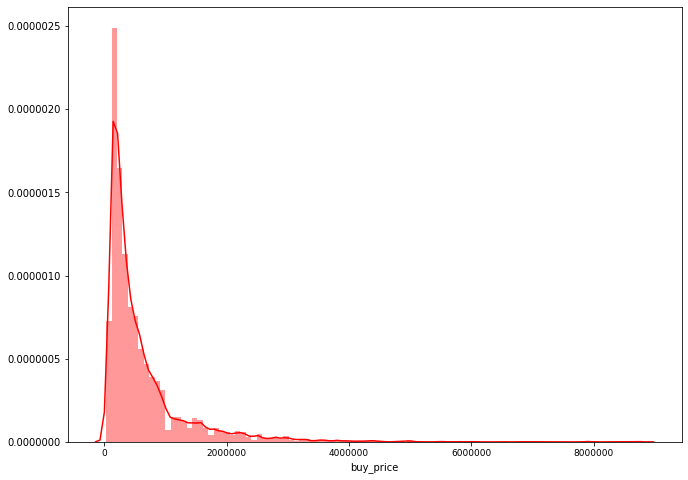

In [199]:
f, ax = plt.subplots(figsize=(11, 8))
sns.distplot(final['buy_price'], color='red', bins=100)

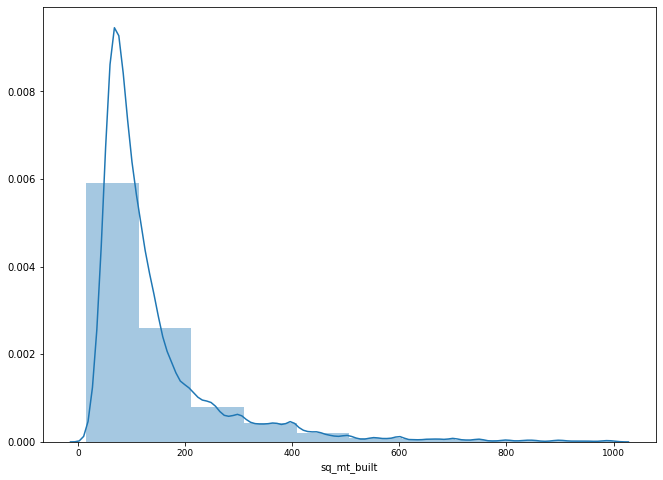

In [200]:
f, ax = plt.subplots(figsize=(11, 8))
sns.distplot(final['sq_mt_built'], bins=10)

In [201]:
make_dist = final.groupby('subtitle').size()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

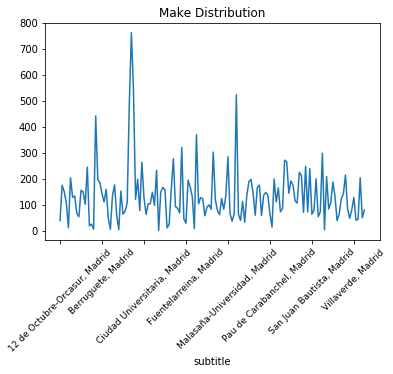

In [202]:
make_dist.plot(title = 'Make Distribution')
plt.xticks(rotation = 45)

In [203]:
house_num = final.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDDEFD8548>,
      dtype=object)

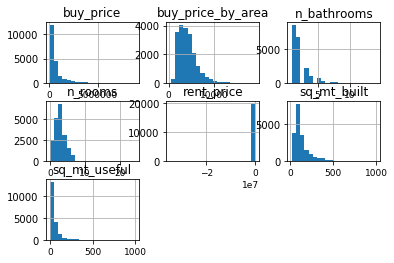

In [204]:
#histograms
house_num.hist(bins = 20)

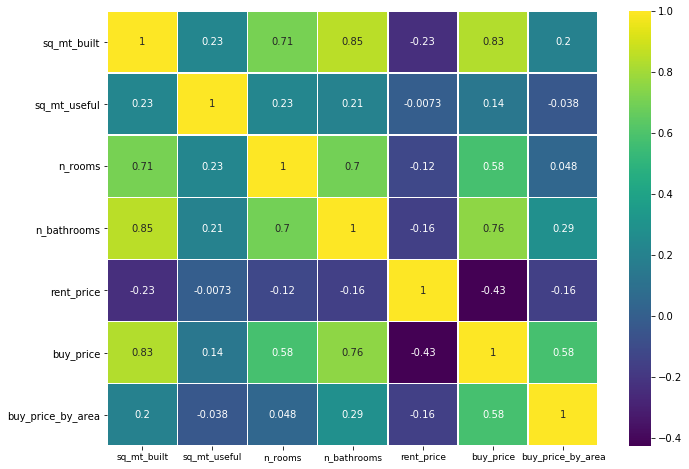

In [205]:
#heat map
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(house_num.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

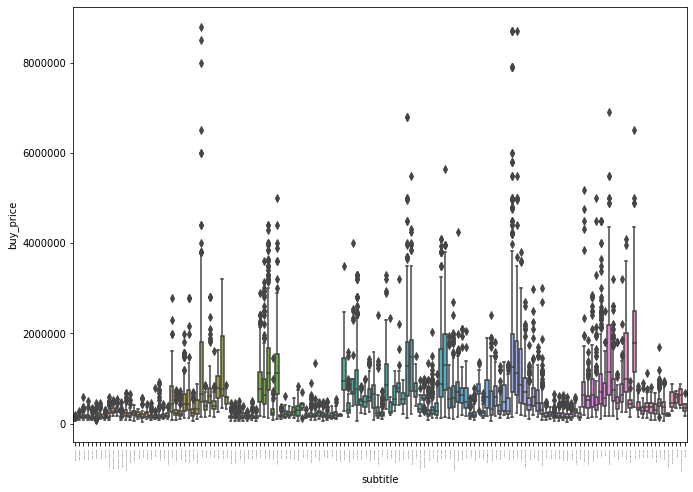

In [207]:
#box plots
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'subtitle', y= 'buy_price', data = final)
plt.xticks(rotation = -90)
plt.rc('xtick', labelsize=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

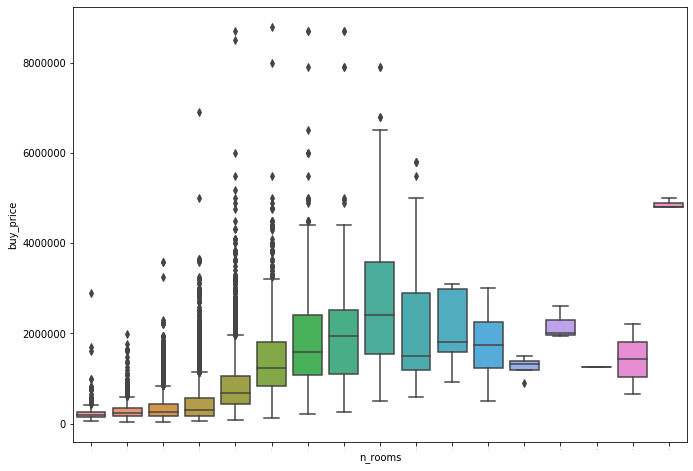

In [208]:
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'n_rooms', y= 'buy_price', data = final)
plt.xticks(rotation = 0)

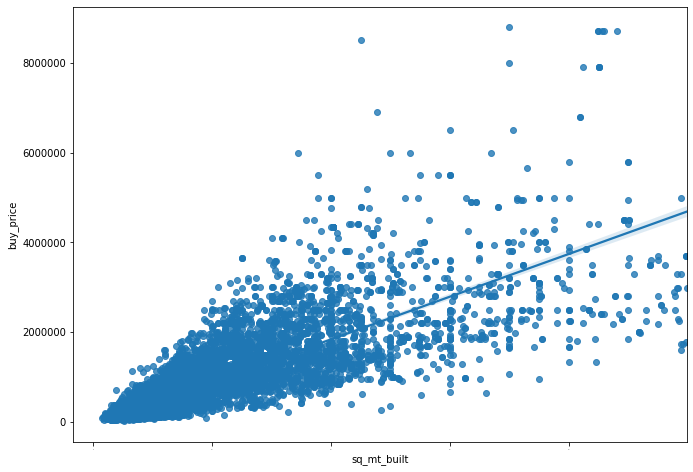

In [211]:
#regression plot
f, ax = plt.subplots(figsize=(11, 8))
sns.regplot(final['sq_mt_built'], final['buy_price'])